**Import Libraries**

In [350]:
import pandas as pd  #Data manipulation and analysis
import numpy as np # numerical operations
import matplotlib.pyplot as plt # Basic Plotting
from matplotlib.ticker import FuncFormatter # Formatting Plotting
import seaborn as sns #Statistical visualization

plt.style.use('default')

Output formatting layer

In [351]:
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}' if abs(x) >= 1 else f'{x}')
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.formatter.use_mathtext'] = False

def apply_global_formatter():
    ax = plt.gca()
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)


**Load Dataset**

Read data set into pandas dataframe 

In [352]:
df = pd.read_csv(r'data/Salary_Dataset_DSL.csv')

# Quick Data Inspection

**View first few rows to verify data structure**

In [353]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,4.00,10,IOS & Android Developer,684000,1,New Delhi,Full Time,Android
1,3.90,700,Test Engineer,696000,1,Hyderabad,Full Time,Testing
2,3.30,1985,Web Developer,312000,1,Bangalore,Full Time,Web
3,3.80,2018,Core Java Developer,708000,1,Chennai,Full Time,Java
4,3.90,17544,Full Stack Java Developer,1900000,1,Hyderabad,Full Time,Java


**Check dataset shape (rows, columns)**

In [354]:
df.shape

(22770, 8)

**View Column names and data type**

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 978.5+ KB


**Summary statistics for numerical columns**

In [356]:
df.describe()

,Rating,Salary,Salaries Reported
count,22770.00,22770.00,22770.00
mean,3.92,695387.21,1.86
std,0.52,884399.01,6.82
min,1.00,2112.00,1.00
25%,3.70,300000.00,1.00
50%,3.90,500000.00,1.00
75%,4.20,900000.00,1.00
max,5.00,90000000.00,361.00


**Check null/missing values per columns**

In [357]:
df.isnull()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
22765,False,False,False,False,False,False,False,False
22766,False,False,False,False,False,False,False,False
22767,False,False,False,False,False,False,False,False
22768,False,False,False,False,False,False,False,False


In [358]:
df.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

## Data Cleaning


**Remove duplicate columns**

Remove excat dulicate rows to avoid double counting

In [359]:
df.drop_duplicates()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,4.00,10,IOS & Android Developer,684000,1,New Delhi,Full Time,Android
1,3.90,700,Test Engineer,696000,1,Hyderabad,Full Time,Testing
2,3.30,1985,Web Developer,312000,1,Bangalore,Full Time,Web
3,3.80,2018,Core Java Developer,708000,1,Chennai,Full Time,Java
4,3.90,17544,Full Stack Java Developer,1900000,1,Hyderabad,Full Time,Java
...,...,...,...,...,...,...,...,...
22765,3.90,Zyoin,Android Developer,400000,1,Bangalore,Full Time,Android
22766,3.90,Zyoin,Test Engineer - Contractor,600000,1,Bangalore,Contractor,Testing
22767,4.80,Zypp Electric,Android Developer,600000,1,New Delhi,Full Time,Android
22768,4.20,Zyro Technology Solutions,Test Engineer,400000,1,Bangalore,Full Time,Testing


**Outlier detection and removing**

Salary Outlier analysis and detecion using IQR method. Filtering outlier and removing it.

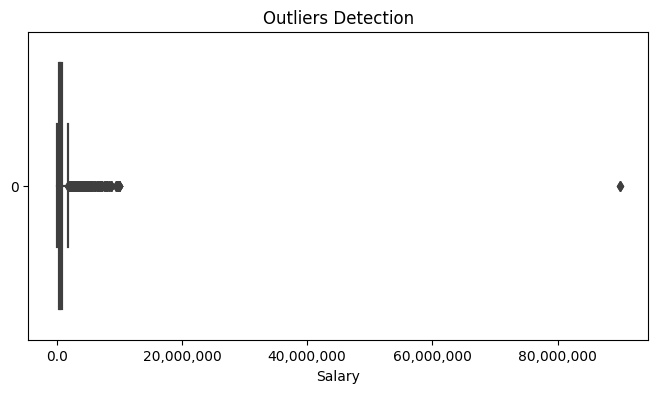

In [360]:
plt.figure(figsize=(8,4))
sns.boxplot(x= df['Salary'])
plt.title("Outliers Detection")
sns.boxplot(x=df["Salary"])
apply_global_formatter()
plt.show()


In [361]:
df.sort_values(by='Salary', ascending=False).head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
19875,3.60,Thapar University,Software Development Engineer (SDE),90000000,1,New Delhi,Full Time,SDE
4519,3.80,Concentrix,Oracle Database Administrator,10000000,1,Bangalore,Full Time,Database
11356,3.50,Koru UX Design,Senior Front End Developer,10000000,1,Pune,Full Time,Frontend
14292,3.60,OASYS Cybernetics,Senior Java Developer,10000000,1,Chennai,Full Time,Java
13870,3.70,Nityo Infotech,"Lead UI Designer, Magento Front-end Developer",9900000,1,Bangalore,Full Time,Frontend


By sorting the salary in decenidng order, we can see that, The first record in the is far from others. That is outlier. We are going toapply outlier treatment

In [362]:
#Finding outlier with IQR method
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR =Q3 - Q1

lower_limit = Q1 -1.5*IQR
upper_limit = Q3 + 1.5 *IQR

df2 = df[(df['Salary'] >= lower_limit) & (df['Salary'] <= upper_limit)]

In [363]:
lower_limit

-600000.0

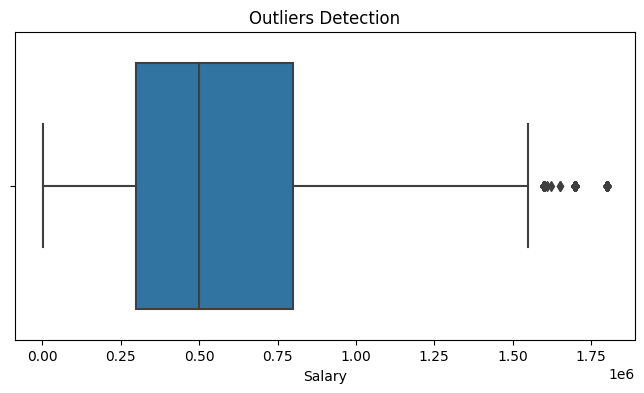

In [364]:
plt.figure(figsize=(8,4))
sns.boxplot(x= df2['Salary'])
plt.title("Outliers Detection")
plt.show()


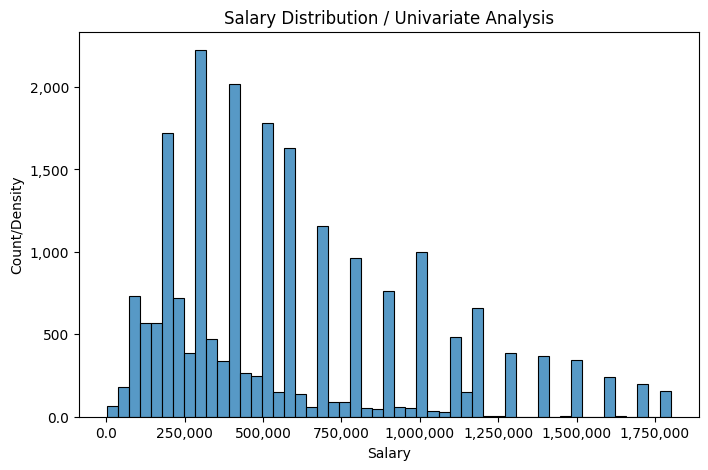

In [365]:
plt.figure(figsize=(8,5))
sns.histplot(df2['Salary'], kde= False)
apply_global_formatter()
plt.title("Salary Distribution / Univariate Analysis")
plt.xlabel("Salary")
plt.ylabel("Count/Density")
plt.show()

In [366]:
df2.sort_values(by='Salary',ascending=True).head(20)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
11145,2.60,Keeves Technologies,Web Developer - Intern,2112,1,Bangalore,Intern,Web
21188,3.70,Virtusa,Junior Java Developer,8448,5,Hyderabad,Full Time,Java
16,4.00,....,Software Development Engineer (SDE),12000,1,New Delhi,Full Time,SDE
12612,4.40,Microsoft,Software Development Engineer,12000,1,Hyderabad,Full Time,SDE
2710,3.40,BharatPe,Software Development Engineer (SDE),12000,1,New Delhi,Full Time,SDE
2437,3.90,Awign Enterprises,Senior Java Developer Contractor,12000,1,Hyderabad,Contractor,Java
13456,4.00,Nasya Software Technologies,Front End Developer - Intern,12000,1,Bangalore,Intern,Frontend
22187,3.80,XYZ,Software Development Engineer (SDE) - Intern,12000,1,Hyderabad,Intern,SDE
1099,3.90,Al-Jazirah,Senior IOS Developer,12000,1,Bangalore,Full Time,IOS
608,3.50,Acmatics Technologies,Android Developer,12000,1,New Delhi,Full Time,Android


In [367]:
df2.sort_values(by='Salary',ascending=False).head(20)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
9794,4.20,INFINIMINDS,Front End Developer,1800000,1,Hyderabad,Full Time,Frontend
18511,3.90,Sumo Logic,Software Development Engineer I,1800000,1,New Delhi,Full Time,SDE
18667,4.10,Swiggy,Software Development Engineer I,1800000,8,Bangalore,Full Time,SDE
18661,4.10,Swiggy,Software Development Engineer (SDE1),1800000,3,Bangalore,Full Time,SDE
14132,3.60,Nspira Management Services,Android Lead,1800000,1,Hyderabad,Full Time,Android
22248,3.70,XYZ Pvt LTD,Software Development Engineer,1800000,1,Pune,Full Time,SDE
14171,3.30,NTT DATA FA Insurance Systems,Senior Oracle Database Administrator,1800000,1,Bangalore,Full Time,Database
18655,4.10,Swiggy,Software Development Engineer I,1800000,1,Hyderabad,Full Time,SDE
7803,4.00,GE,Lead Front End Developer,1800000,1,Bangalore,Full Time,Frontend
5108,3.90,DBS Bank,Android Developer,1800000,1,Hyderabad,Full Time,Android


By looking at the data after outlier removal, we can see that there are lots more data removed with higher salaries. The maximum salary is 18,00,000. The minimum salary is 2112. The bith boundries are not reliable. Yearly salary can be more than 18,00,000 and minimum salary for intern should be 36000 (consideing 3000 stipend per month). So we are going to apply threshold method.


Minimum range will be 36000.
Maximum range will be as per outlier in our box plot which we are going to find.

There is one outlier for salary that is far away.

In [368]:
df = df[df['Salary'] < 90000000]

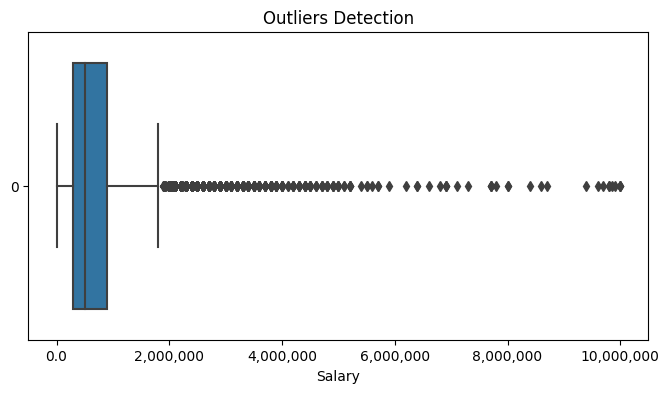

In [369]:
plt.figure(figsize=(8,4))
sns.boxplot(x= df['Salary'])
apply_global_formatter()
plt.title("Outliers Detection")

plt.show()


But here we can see that there are many points still as outlier. There are still lots of records whose salary upto 36 lakh or 40 lakh.
So the upper range for threshold will be 36 lakh.

In [370]:
lower_limit = 36000
upper_limit = 4000000

df = df[(df['Salary'] >= lower_limit) & (df['Salary'] <= upper_limit)]

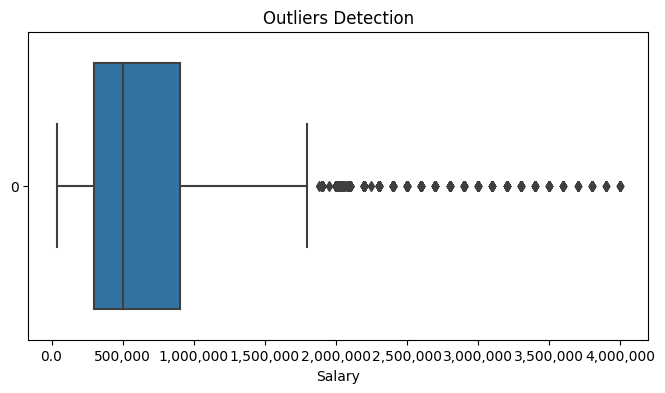

In [371]:
plt.figure(figsize=(8,4))
sns.boxplot(x= df['Salary'])
plt.title("Outliers Detection")
apply_global_formatter()
plt.show()


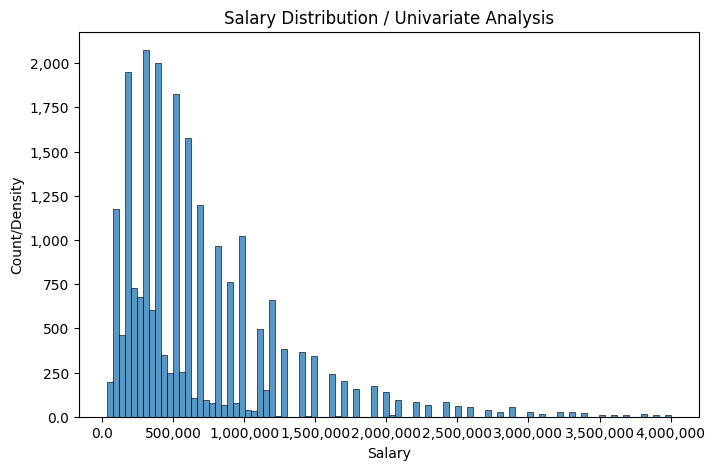

In [372]:
plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], kde= False)
plt.title("Salary Distribution / Univariate Analysis")
apply_global_formatter()
plt.xlabel("Salary")
plt.ylabel("Count/Density")
plt.show()

In [373]:
df.sort_values(by='Salary',ascending=False).head(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
18018,2.90,Solera,Database Administrator,4000000,1,Bangalore,Full Time,Database
12664,4.40,Microsoft,Senior Software Development Engineer Lead,4000000,3,Hyderabad,Full Time,SDE
20610,3.70,universal construction machinery and equipment,Software Development Engineer In Test (SDET),4000000,1,Pune,Full Time,SDE
7984,2.90,GKB Hi-Tech,Software Development Engineer,4000000,1,Bangalore,Full Time,SDE
9084,3.30,Hotstar,Sr Software Development Engineer,4000000,1,Mumbai,Full Time,SDE
4380,4.10,Cohesity,Oracle Database Administrator,4000000,1,Bangalore,Full Time,Database
12002,3.20,M*Modal,"Manager, Database Administration",4000000,1,Bangalore,Full Time,Database
14244,4.70,NVIDIA,Senior Software Development Engineer,4000000,1,Hyderabad,Full Time,SDE
22169,3.90,XYX MEDIA TECHNOLOGIES,Senior Java Developer - Contractor,3900000,1,Hyderabad,Contractor,Java
8867,4.20,Hevo Data,Software Development Engineer II,3900000,1,New Delhi,Full Time,SDE


In [374]:
df.sort_values(by='Salary',ascending=True).head(20)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
14214,1.00,Numa Soft,Front-End Developer - Intern,36000,1,Bangalore,Intern,Frontend
9125,3.30,HPC Sphere,Software Development Engineer - Intern,36000,2,New Delhi,Intern,SDE
4181,4.10,Cogent Web Services,Android Developer - Intern,36000,2,New Delhi,Intern,Android
8584,3.90,Hash Dhronas,Software Development Engineer - Intern,36000,1,Chennai,Intern,SDE
1624,3.80,Anonymous,Front End Developer - Intern,36000,1,Bangalore,Intern,Frontend
10216,4.10,Innovative Tech Lab,Backend Developer,36000,1,Pune,Full Time,Backend
19526,4.20,TechoKids,Backend Developer - Intern,36000,1,New Delhi,Intern,Backend
10059,3.60,Infosys BPM,Test Engineer,36000,1,Hyderabad,Full Time,Testing
20542,2.30,Unicorn Store,IOS Engineer,36000,1,New Delhi,Full Time,IOS
20365,3.00,Trippleatt.com,Android Developer - Intern,36000,1,New Delhi,Intern,Android


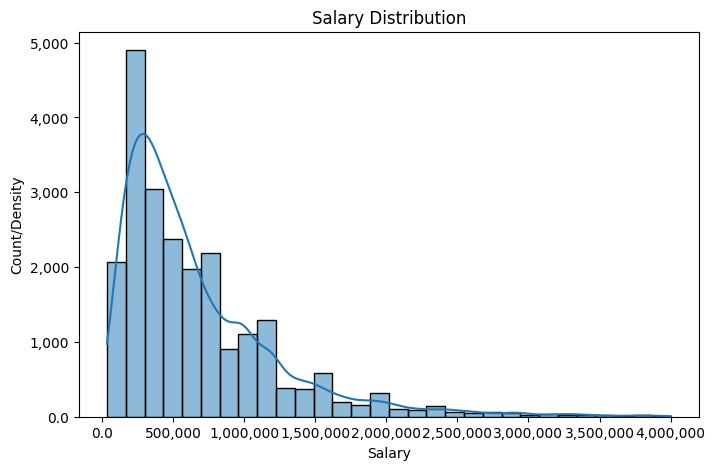

In [375]:
plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], bins=30, kde= True)
apply_global_formatter()
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count/Density")
#plt.ticklabel_format(style='plain', axis='x')
plt.show()

# Answering the business Question

**Q1 :  Which job roles have highest salary?**

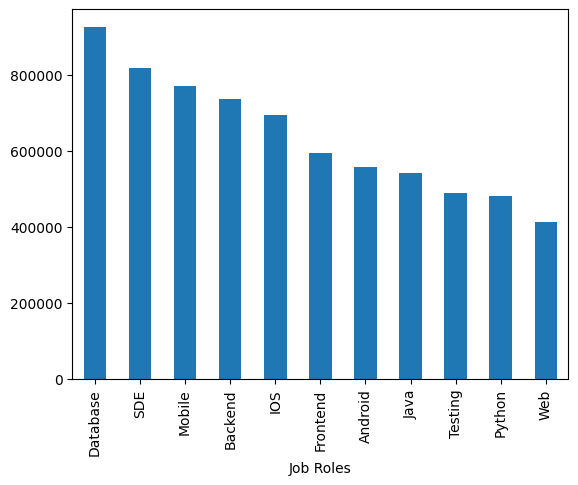

In [376]:
grp = df.groupby('Job Roles')['Salary'].mean().sort_values(ascending=False)
grp.plot(kind='bar')
plt.show()

Answer : Database role has higherst salary.

**Q2 : Which cities offer the highest salary?**

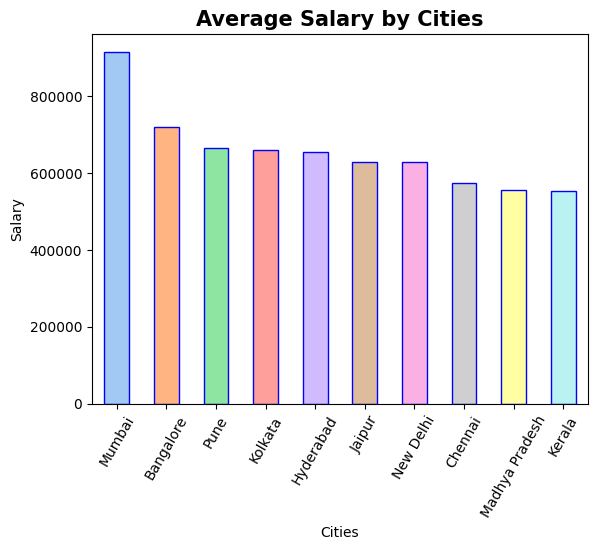

In [377]:
color = sns.color_palette('pastel')


salary_by_location = df.groupby('Location')['Salary'].mean().sort_values(ascending=False)
salary_by_location.plot(kind='bar',color=color, edgecolor='blue')
plt.ylabel("Salary")
plt.xlabel("Cities")
plt.xticks(rotation=60)
plt.title("Average Salary by Cities", fontsize=15, fontweight='bold')
plt.show()  

Answer: Generally Location does not effect salary.  Mumbai has higher salary but the cost of living is way higher there.

**Q3: Name those 5 companies located in 'New Delhi' with rating of '5', offering highest & lowest salaries.**

In [378]:
delhi_5_star = df[(df['Location'] == "New Delhi") & (df['Rating'] == 5)]


In [379]:
delhi_5_star = delhi_5_star.sort_values(by='Salary', ascending=False)
delhi_5_star.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
11901,5.00,Loyakk,IOS Team Lead,3600000,1,New Delhi,Full Time,IOS
15482,5.00,powerplay app,Android Developer,2600000,1,New Delhi,Full Time,Android
20670,5.00,Uptown Galeria,Software Development Engineer (SDE),2400000,1,New Delhi,Full Time,SDE
6824,5.00,FGR FOODS,Software Development Engineer,1900000,1,New Delhi,Full Time,SDE
6942,5.00,Firevol,Software Development Engineer (SDE),1700000,1,New Delhi,Full Time,SDE


In [380]:
delhi_5_star.tail(5)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
13583,5.00,Neo Fitnes,Android Developer,100000,1,New Delhi,Full Time,Android
22013,5.00,WorkingNation,Android Developer - Intern,84000,1,New Delhi,Intern,Android
2278,5.00,Atom 8,Software Development Engineer (SDE) - Intern,60000,1,New Delhi,Intern,SDE
18363,5.00,Star Catalysts,Software Development Engineer - Intern,60000,1,New Delhi,Intern,SDE
9061,5.00,Hopin (India),Android Developer - Intern,60000,1,New Delhi,Intern,Android


In [381]:

highest_5 = list(delhi_5_star['Company Name'].head())
lowest_5 = list(delhi_5_star['Company Name'].tail())

In [382]:
highest_5

['Loyakk', 'powerplay app', 'Uptown Galeria', 'FGR FOODS', 'Firevol']

In [383]:
lowest_5

['Neo Fitnes', 'WorkingNation', 'Atom 8', 'Star Catalysts', 'Hopin (India)']

**Q4 : Which job title has the highest number of salary reported?**

In [384]:
df['Job Title'].value_counts()

Software Development Engineer                               2336
Android Developer                                           2021
Software Development Engineer (SDE)                         1603
Front End Developer                                         1408
Test Engineer                                               1310
                                                            ... 
Software Engineer Python - Machine Learning Role               1
Microsoft Software Development Engineer In Test - Intern       1
Senior Mobile Product Manager                                  1
Senior Database Programmer                                     1
Java Manager                                                   1
Name: Job Title, Length: 1069, dtype: int64

In [386]:
df['Job Title']  =df['Job Title'].replace({"Software Development Engineer (SDE)":"Software Development Engineer"})

In [387]:
df['Job Title'].value_counts()


Software Development Engineer                  3939
Android Developer                              2021
Front End Developer                            1408
Test Engineer                                  1310
Web Developer                                   850
                                               ... 
Software Tester - Contractor                      1
Senior Mobile Product Manager                     1
Senior Database Programmer                        1
Ms SQL Database Administrator                     1
Staff Software Development Engineer In Test       1
Name: Job Title, Length: 1068, dtype: int64

In [388]:
job_titles = df.groupby("Job Title")["Salaries Reported"].sum().sort_values(ascending=False)

In [390]:
job_titles = job_titles.head(10) 

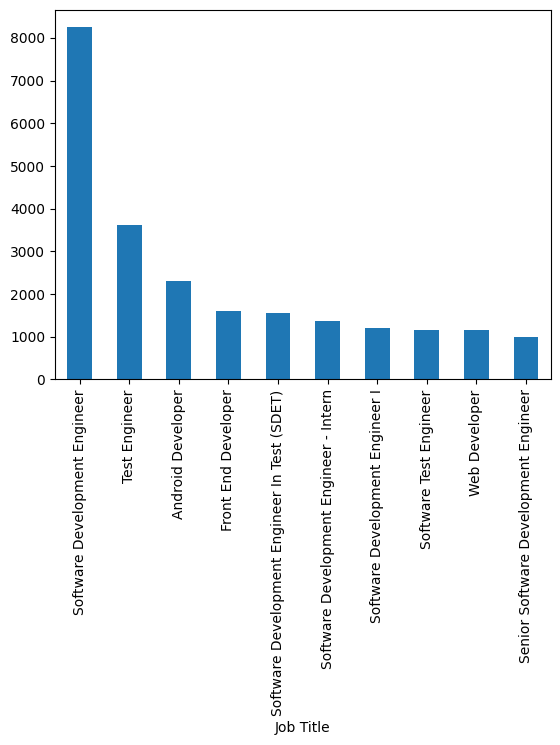

In [391]:
job_titles.plot(kind='bar')
plt.show()

**Q5: Which 10 companies provide the highest average salary, when at least 20 employees have reported their salaries?**

In [394]:



salary_by_company = df.groupby("Company Name").agg({"Salary":'mean', "Salaries Reported" :'sum'} )
salary_by_company = salary_by_company[salary_by_company["Salaries Reported"] >=20]
salary_by_company = salary_by_company.sort_values(by="Salary", ascending=False)
pd.options.display.float_format = '{:.2f}'.format
salary_by_company.head(10)



,Salary,Salaries Reported
Company Name,,
Hotstar,2398500.00,31
Groupon,2050000.00,32
Trilogy Innovations,2044000.00,32
ShareChat,1857250.00,45
Media.net,1825000.00,20
MindTickle,1819529.41,55
InMobi,1788923.08,56
Blinkit,1714571.43,26
Razorpay,1686545.45,40


**Q6: Is there relationship between company rating and salary?**


In [395]:
grp_by_rating = df.groupby("Rating")["Salary"].mean()


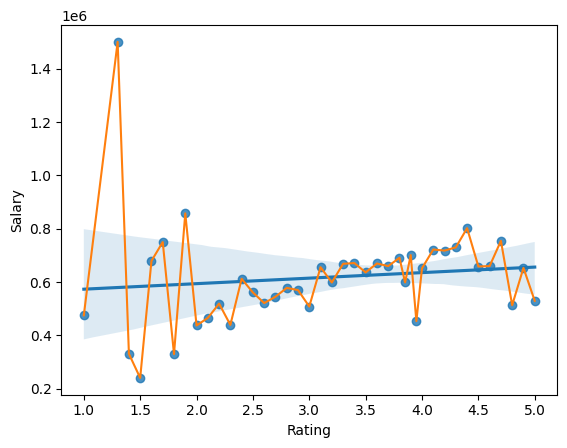

In [396]:
sns.regplot(x=grp_by_rating.index, y=grp_by_rating.values, scatter=True)
sns.lineplot(data=grp_by_rating)
plt.show()

In [400]:
rating_1_3 = df[df['Rating'] == 1.3].sort_values(by='Salary',ascending=False)
rating_1_3

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
4618,1.30,Coozo Creative Solutions,Software Development Engineer,2500000,1,Pune,Full Time,SDE
19263,1.30,T-Chowk Labs,Senior IOS Developer,500000,1,New Delhi,Full Time,IOS


There are only two records with rating 1.3, in which one has higher salary. That record creates up  in salary tread.

 So generally they are outlier which creates up treands.

 We have also noticed in previous section that Software Development  Engineers generally has higher salaries.

Other than that all companies are performing according to ratings. As the rating increases there is slow hike in salary generally.

**Q7: Does employment status affect salary?**

In [402]:
grp_employment_status = df.groupby("Employment Status")["Salary"].mean().sort_values(ascending=False)
grp_employment_status

Employment Status
Full Time    709326.34
Contractor   605359.41
Intern       353049.61
Trainee      324303.03
Name: Salary, dtype: float64

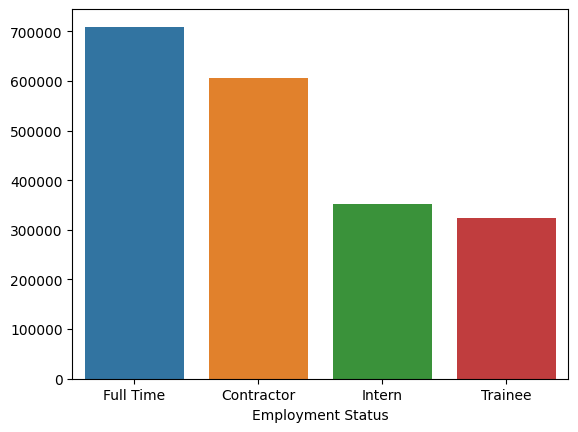

In [403]:
sns.barplot(x=grp_employment_status.index, y=grp_employment_status.values)
plt.show()

Full time employees and contracor have higher salary.
Intern and Trainee have lower salary

**Q8: Which job roles are most common?**

In [406]:
df['Job Roles'].unique()

array(['Android', 'Testing', 'Web', 'Java', 'Backend', 'Mobile', 'SDE',
       'Frontend', 'Database', 'Python', 'IOS'], dtype=object)

In [408]:
df['Job Roles'].value_counts()

SDE         8123
Android     2928
Frontend    2148
Java        1846
Testing     1735
IOS         1627
Backend     1188
Web          995
Python       944
Database     860
Mobile       240
Name: Job Roles, dtype: int64

SDE is most common job role.

**Q9: How do salaries vary across locations?**

In [409]:
df['Location'].unique()

array(['New Delhi', 'Hyderabad', 'Bangalore', 'Chennai', 'Mumbai',
       'Jaipur', 'Kolkata', 'Pune', 'Madhya Pradesh', 'Kerala'],
      dtype=object)

In [410]:
grp_by_locations = df.groupby('Location')["Salary"].mean().sort_values(ascending=False)

In [411]:
grp_by_locations

Location
Mumbai           914855.52
Bangalore        720394.13
Pune             665745.86
Kolkata          659292.38
Hyderabad        655454.79
Jaipur           629135.80
New Delhi        628348.75
Chennai          573965.99
Madhya Pradesh   555490.11
Kerala           553577.48
Name: Salary, dtype: float64

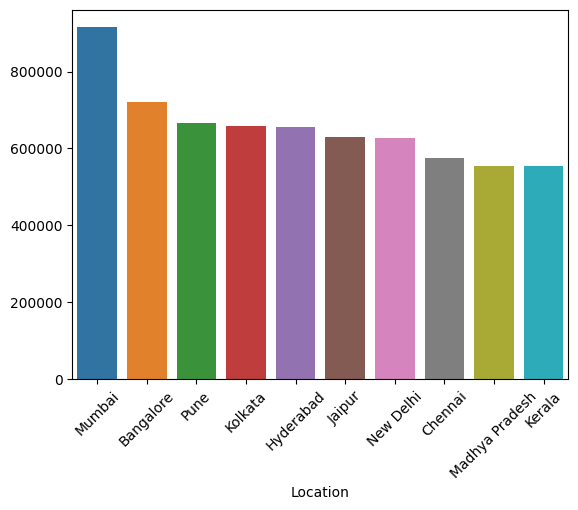

In [412]:
sns.barplot(x= grp_by_locations.index, y=grp_by_locations.values)
plt.xticks(rotation = 45)
plt.show()

Generally Location does not effect salary.  Mumbai has higher salary but the cost of living is way higher there.